# Reducing the number of features
- An unsupervisead learning algorithm called Principal Components.
- This is an algorithm that is commonly used for visualization. 
- Specifically, if we have a dataset with a lot of featurs like 1000, we can't plot 1000 dimensional data PCA. PCA is an algorityhm that let us take with a lot of features and rduce the number of features, so that we can plot it and visualize it.
- 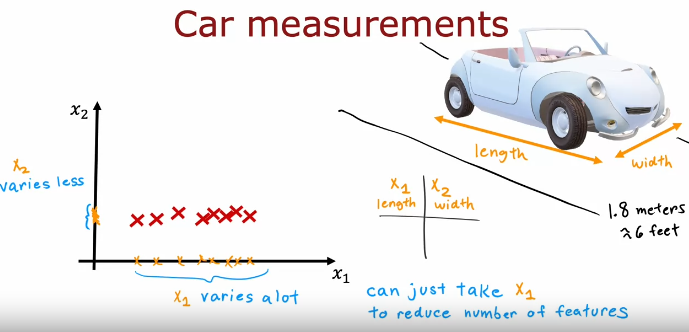
- If we want ot reduce the number of features,w hat should we pick? All the featurres have useful information.
- The idea of PCA is to find one or more new axes, we end up still with very useful information about the car.
- 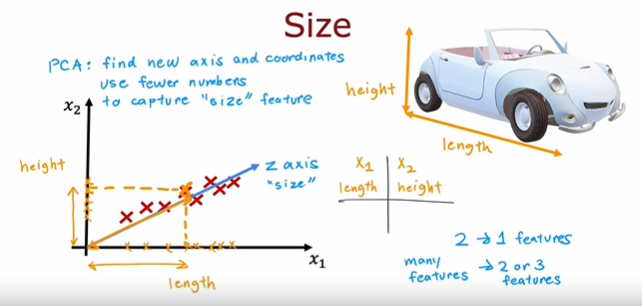
- A PCA, what we can do is, instead of havinf features x_1, x_2, x_3, reduce it to such as 2 numbers, which we're oing to call Z_1 and Z_2
    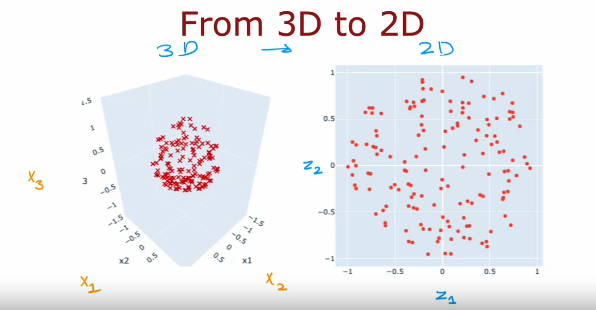
- In practice, PCA is usually used to reduce a very large number of features.
    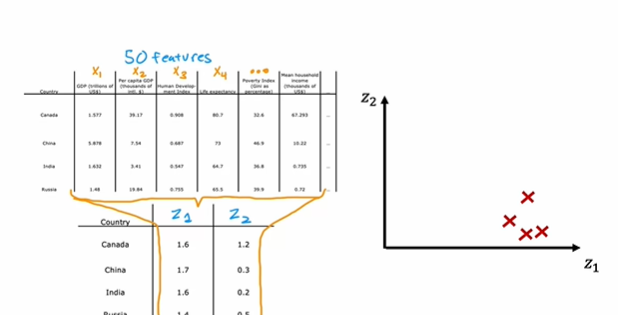
    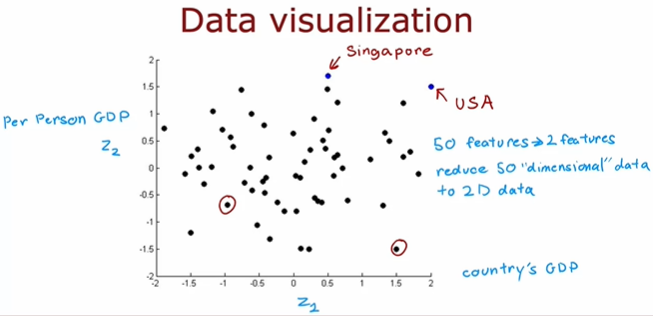
- PCA is a powerful algorithm for taing a lot of features, with a lot of dimensions or high-dimenional data, and reducing it to 2 or 3 features, 2 or 3 dimensional data. So we can plot it and visulize it and better understand what's in our data.

# PCA algorithm 
- One note on preprocessing, before applying the steps of PCA the features should be 1st normalized to have zero mean (Subtract the mean from each feature). Then, If the featurs take on very different scales, then we will perform feature scaling before applying the steps of PCA.
- 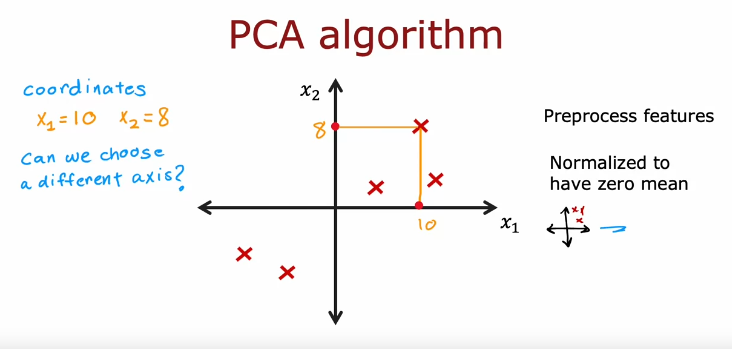
- PCA, going to take each of the examples and project it down to a point on the new z-axis in such a way that the z-axis captures a lot of information
- 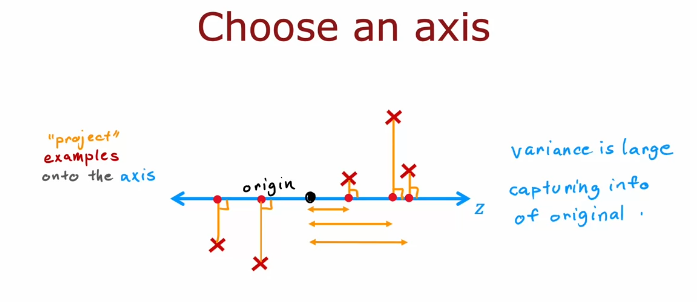
- 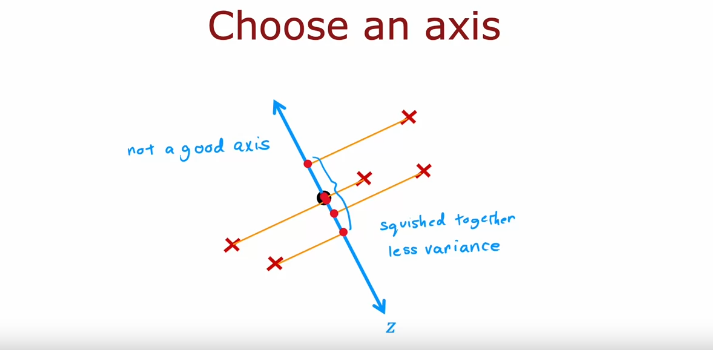
- 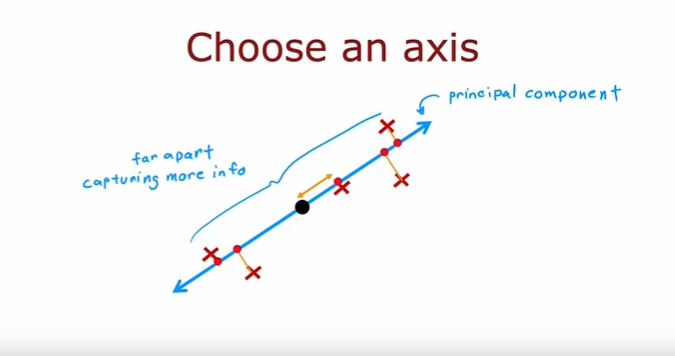
- The best axis is called principal component. In the z-axis that when we projct the data onto it, we end up with the largest possible amounts of variance. If we were to reduce the data to one axis or to one featrue, this principal component is actualy a good choice, and this is what PCA do. If we want to reduce the data to one-dimensional feature, then it will choose of the axis affects the projection.
- 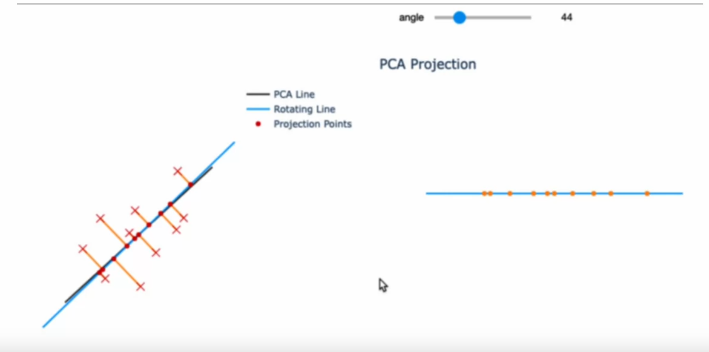
- 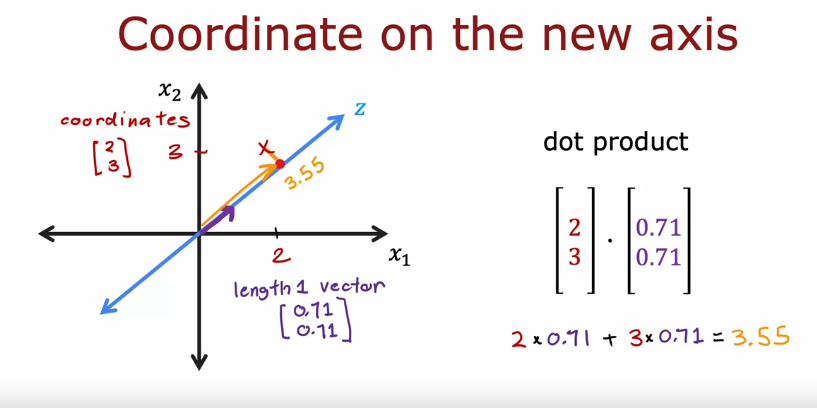
- It turns out that if we were to pick a 2nd axis, the 2nd axis will always be at 90 degrees to the first axis. If were to choose even a third axis, then the third axis will be at 90 degrees to the 1st and the 2nd axis.
- PCA is not linear regression, it is totally different algorithm
- 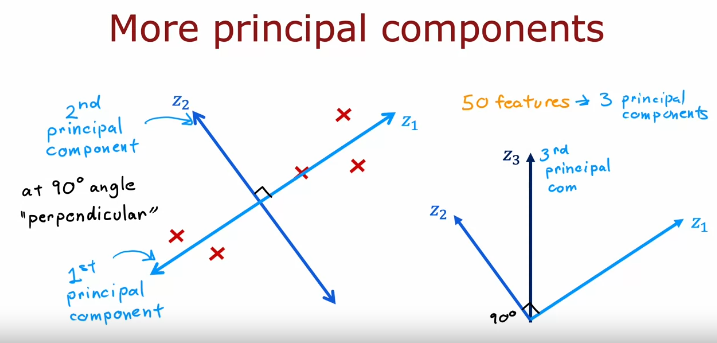
- With linear regression we're trying to fit a straight line so that the predicted value is as close as possiblt to the ground truth label y. In other words, we're trying to minimize the length of these little line segments which are in the vertical direction. They just aligned with the y-axis
- In PCA, there is no ground truth y. We just have unlabeled data, X1 and X2 and furthermore, we're not trying to fit a line to use X1 to predict X2. Instead the average treats X1 and X2 equally. We're trying to find the axis Z, that it turns out we end up making the line segments small when we projec the data on Z.
- When linear regression is used to predict a target output Y and PCA is trying to take a lot of featrues and treat them all equally and reuce the number of axis needed to represent the data well.
- 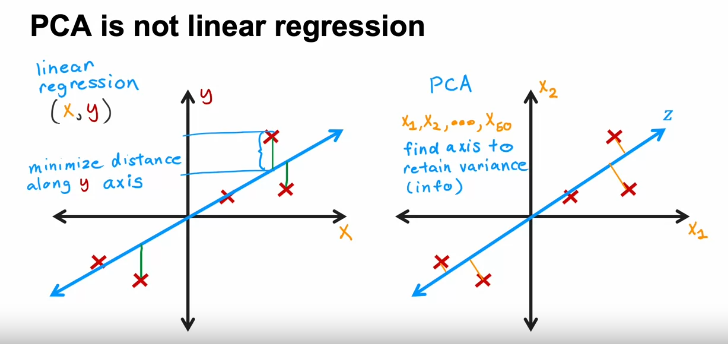
- 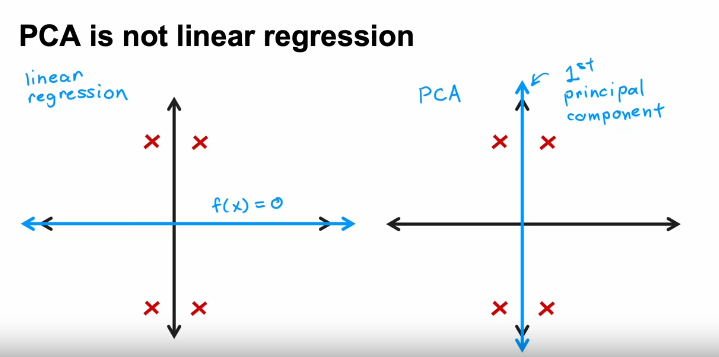
- We should use linear regression if we're trying to predict the value of y amd we should use PCA if we're trying to reduce the number of features in our data set.
- 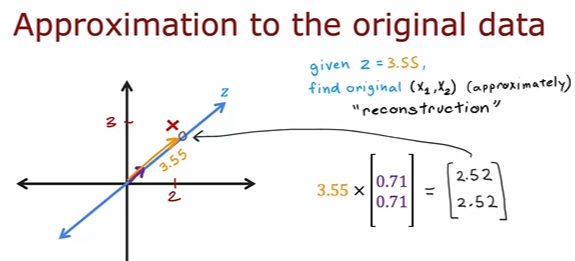
- The PCA algorithm looks at our original data and chooses one or more new axis, Z or may be Z1 and Z2, to represent our data and by taking our original data set and projecting it onto our new axis or axis. This gives us a smaller set of number so we can plot if wished to visualize our data.

# PCA in code
- The main steps : 
    1. If our features take on very different ranges of values, we can perform pre-processing to scale the features to take on comparable ranges of values.
    2. Run the PCA algorithm to fit the data to obtain axes Z.
    - The fit function in PCA automatically carries out mean normalization, it subtracts out the mean of each feature.
    - After running the fit function, we would get the new axes Z and in the PCA, we also call these the principal components.
    3. Taking a look at how much each of these new axes, or each of these new principal components explain the variancce in our data.        
    4. Finally transform the data onto the new axes onto the new principal components, which we do with the transform method.
    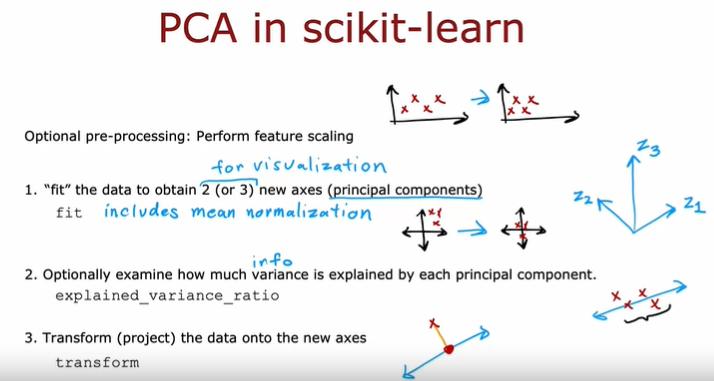
- 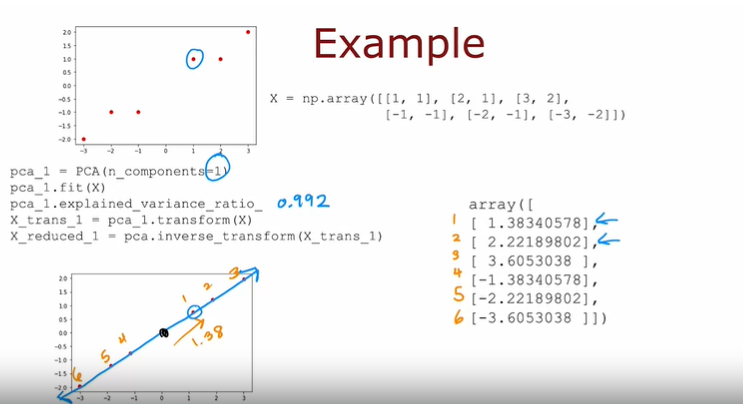
- 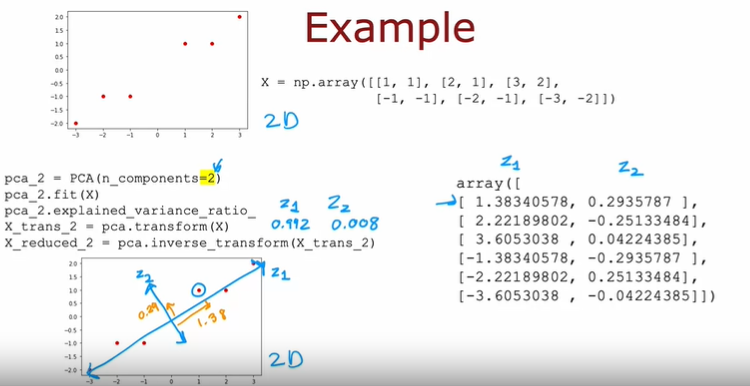
- Another possible use of PCA is data compression. To reduce storage or transmission costs.
- Another possible use of PCA is used to speed up training of a supervised learning  model.
- 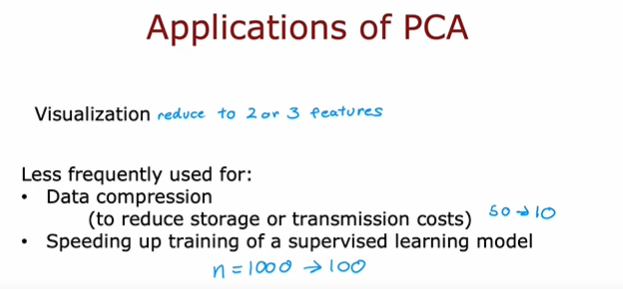

# Optional Lab : PCA and data visulization

## PCA - An example on Exploratory Data Analysis
- Visulize how PCA works 
- Use PCA to find hidden patterns in a high-dimensional dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

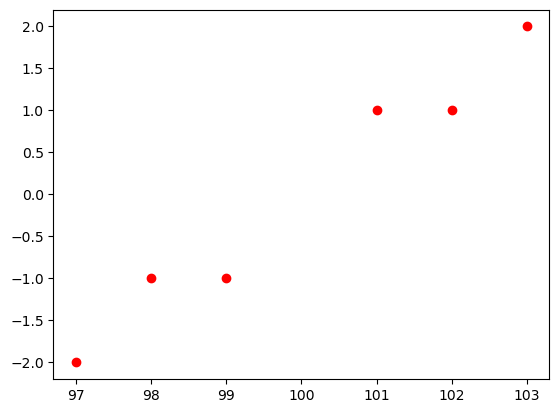

In [5]:
plt.plot(X[: , 0], X[: , 1], 'ro')

In [6]:
# Loading the PCA algorithm
pca_2 = PCA(n_components=2)
pca_2

PCA(n_components=2)

In [7]:
# Let's fit the data. We donot need to scale it, since sklearn's implementation already handls it.
pca_2.fit(X)

PCA(n_components=2)

In [8]:
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

- The coordinates on the 1st principal component (1st axis) are enough to retain 99.24% of the information ("explain variance"). 
- The 2nd principal component adds an additional 0.76% of the information ('explained variance') that is not stored in the 1st principal components coordinates.

In [9]:
X_trans_2 = pca_2.transform(X)
X_trans_2

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

- Think of the column as the coordinate along the 1st principal component (the 1st new axis) and column 2 as the coordinate along the 2nd principal component (the 2nd new axis)

In [10]:
pca_1 = PCA(n_components=1)
pca_1

PCA(n_components=1)

In [11]:
pca_1.fit(X)
pca_1.explained_variance_ratio_

array([0.99244289])

In [12]:
X_trans_1 = pca_1.transform(X)
X_trans_1

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

- Notice that this column is just the 1st column of X_trans_2.

In [13]:
X_reduced_2 = pca_2.inverse_transform(X_trans_2)
X_reduced_2

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

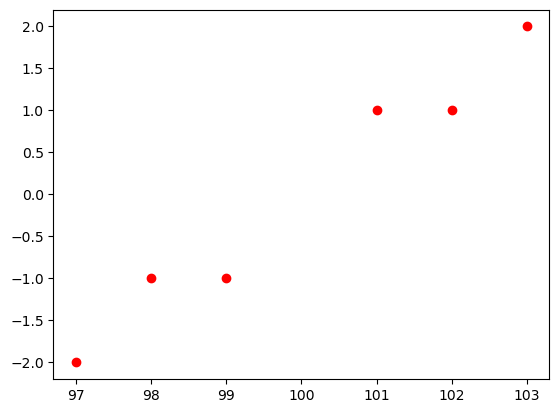

In [15]:
plt.plot(X_reduced_2[:, 0], X_reduced_2[:, 1], 'ro')

In [16]:
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

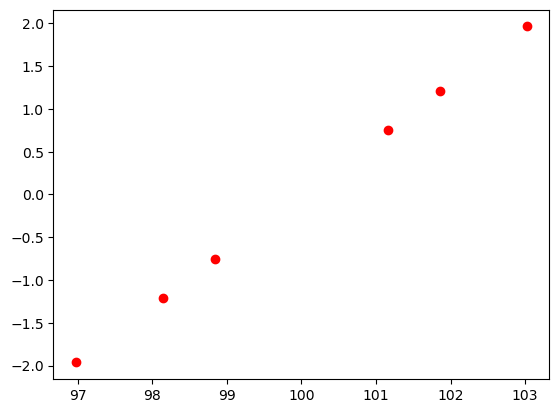

In [17]:
plt.plot(X_reduced_1[:,0], X_reduced_1[:,1], 'ro')

- Notice how the data are now just on a single line (this line is the single principal component that was used to describe the data, and each example has a single 'coordinate' along that axis to describe its location)

- 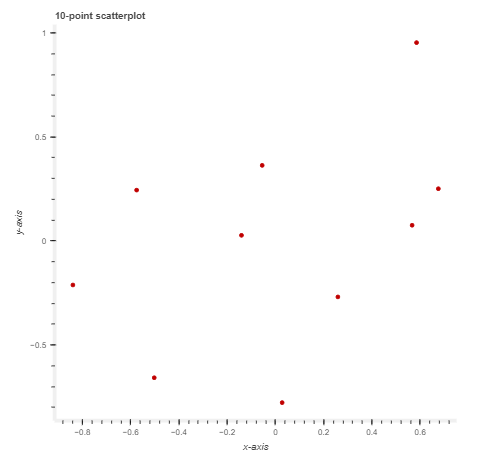
- Different ways of compressing the data into 1-D datapoints will lead to different ways on how the points are spread in the new space. The line generated by PCA is the line that keeps the points as far as possible from each other.
- 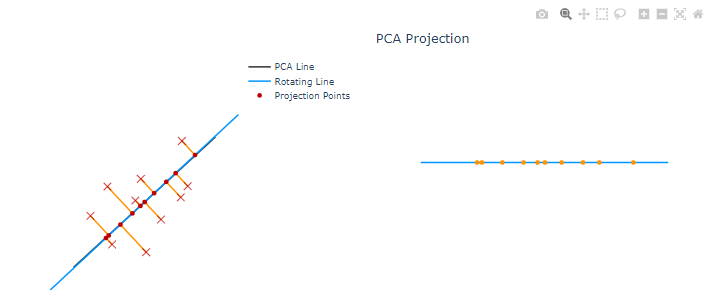

## Visualizing the PCA algorithm
- Will see how some 3-D data can be considered into a 2D space.

In [1]:
def random_point_circle(center=(0,0),radius=1,n=1):
    r = radius * np.sqrt(np.random.rand(n))
    theta = np.random.rand(n) * 2 * np.pi
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    return np.array([x,y]).T

In [2]:
X = random_point_circle(n = 150)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 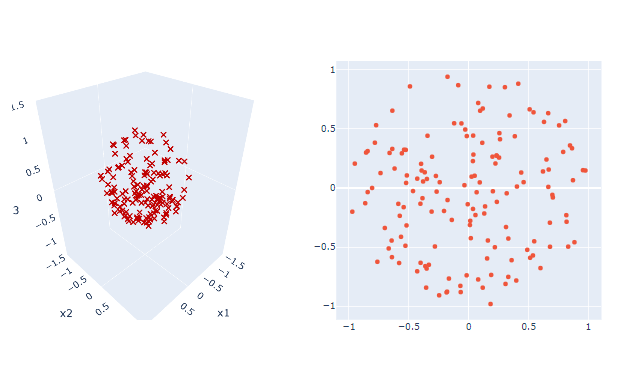

### Using PCA in Exploratory Data Analysis
- Load the dataset with 500 samples and 1000 features

In [3]:
df = pd.read_csv('toy_dataset.csv')

<IPython.core.display.Javascript object>

In [4]:
df.head()

feature_0  feature_1  feature_2  feature_3  ...  feature_996  feature_997  feature_998  feature_999
0  27.422157 -29.662712 -23.297163 -15.161935  ...     8.380699   -25.843189    36.706408   -43.480792
1   3.489482 -19.153551 -14.636424  14.688258  ...    -6.499263    19.921666    -3.528982    31.068739
2   4.293509  22.691579  -1.045155  -8.740350  ...    10.518065    -5.818320   -29.466301   -13.676685
3  -2.139348  23.158754 -26.241206  19.426465  ...   -15.888356    61.384773    33.112334     5.088320
4 -35.251034  27.281816 -29.470282 -21.786865  ...    -7.217724    31.173870    37.097532   -27.509420

[5 rows x 1000 columns]

In [5]:
df.shape

(500, 1000)

- This is a dataset wth 1000 features
- Let's try to see if there is a pattern in the data. The following function will randomly sample 100 pairwise tuples (x,y) of features, so we can scatter-plot them.

In [7]:
def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    while i < 100:
        x = df.columns[randint(0, 999)]
        y = df.columns[randint(0, 999)]
        while x == y or (x, y) in tuples or (y, x) in tuples:
            y = df.columns[randint(0, 999)]
        tuples.append((x, y))
        i += 1
    return tuples

In [8]:
pairs = get_pairs()

- Let's plot them

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

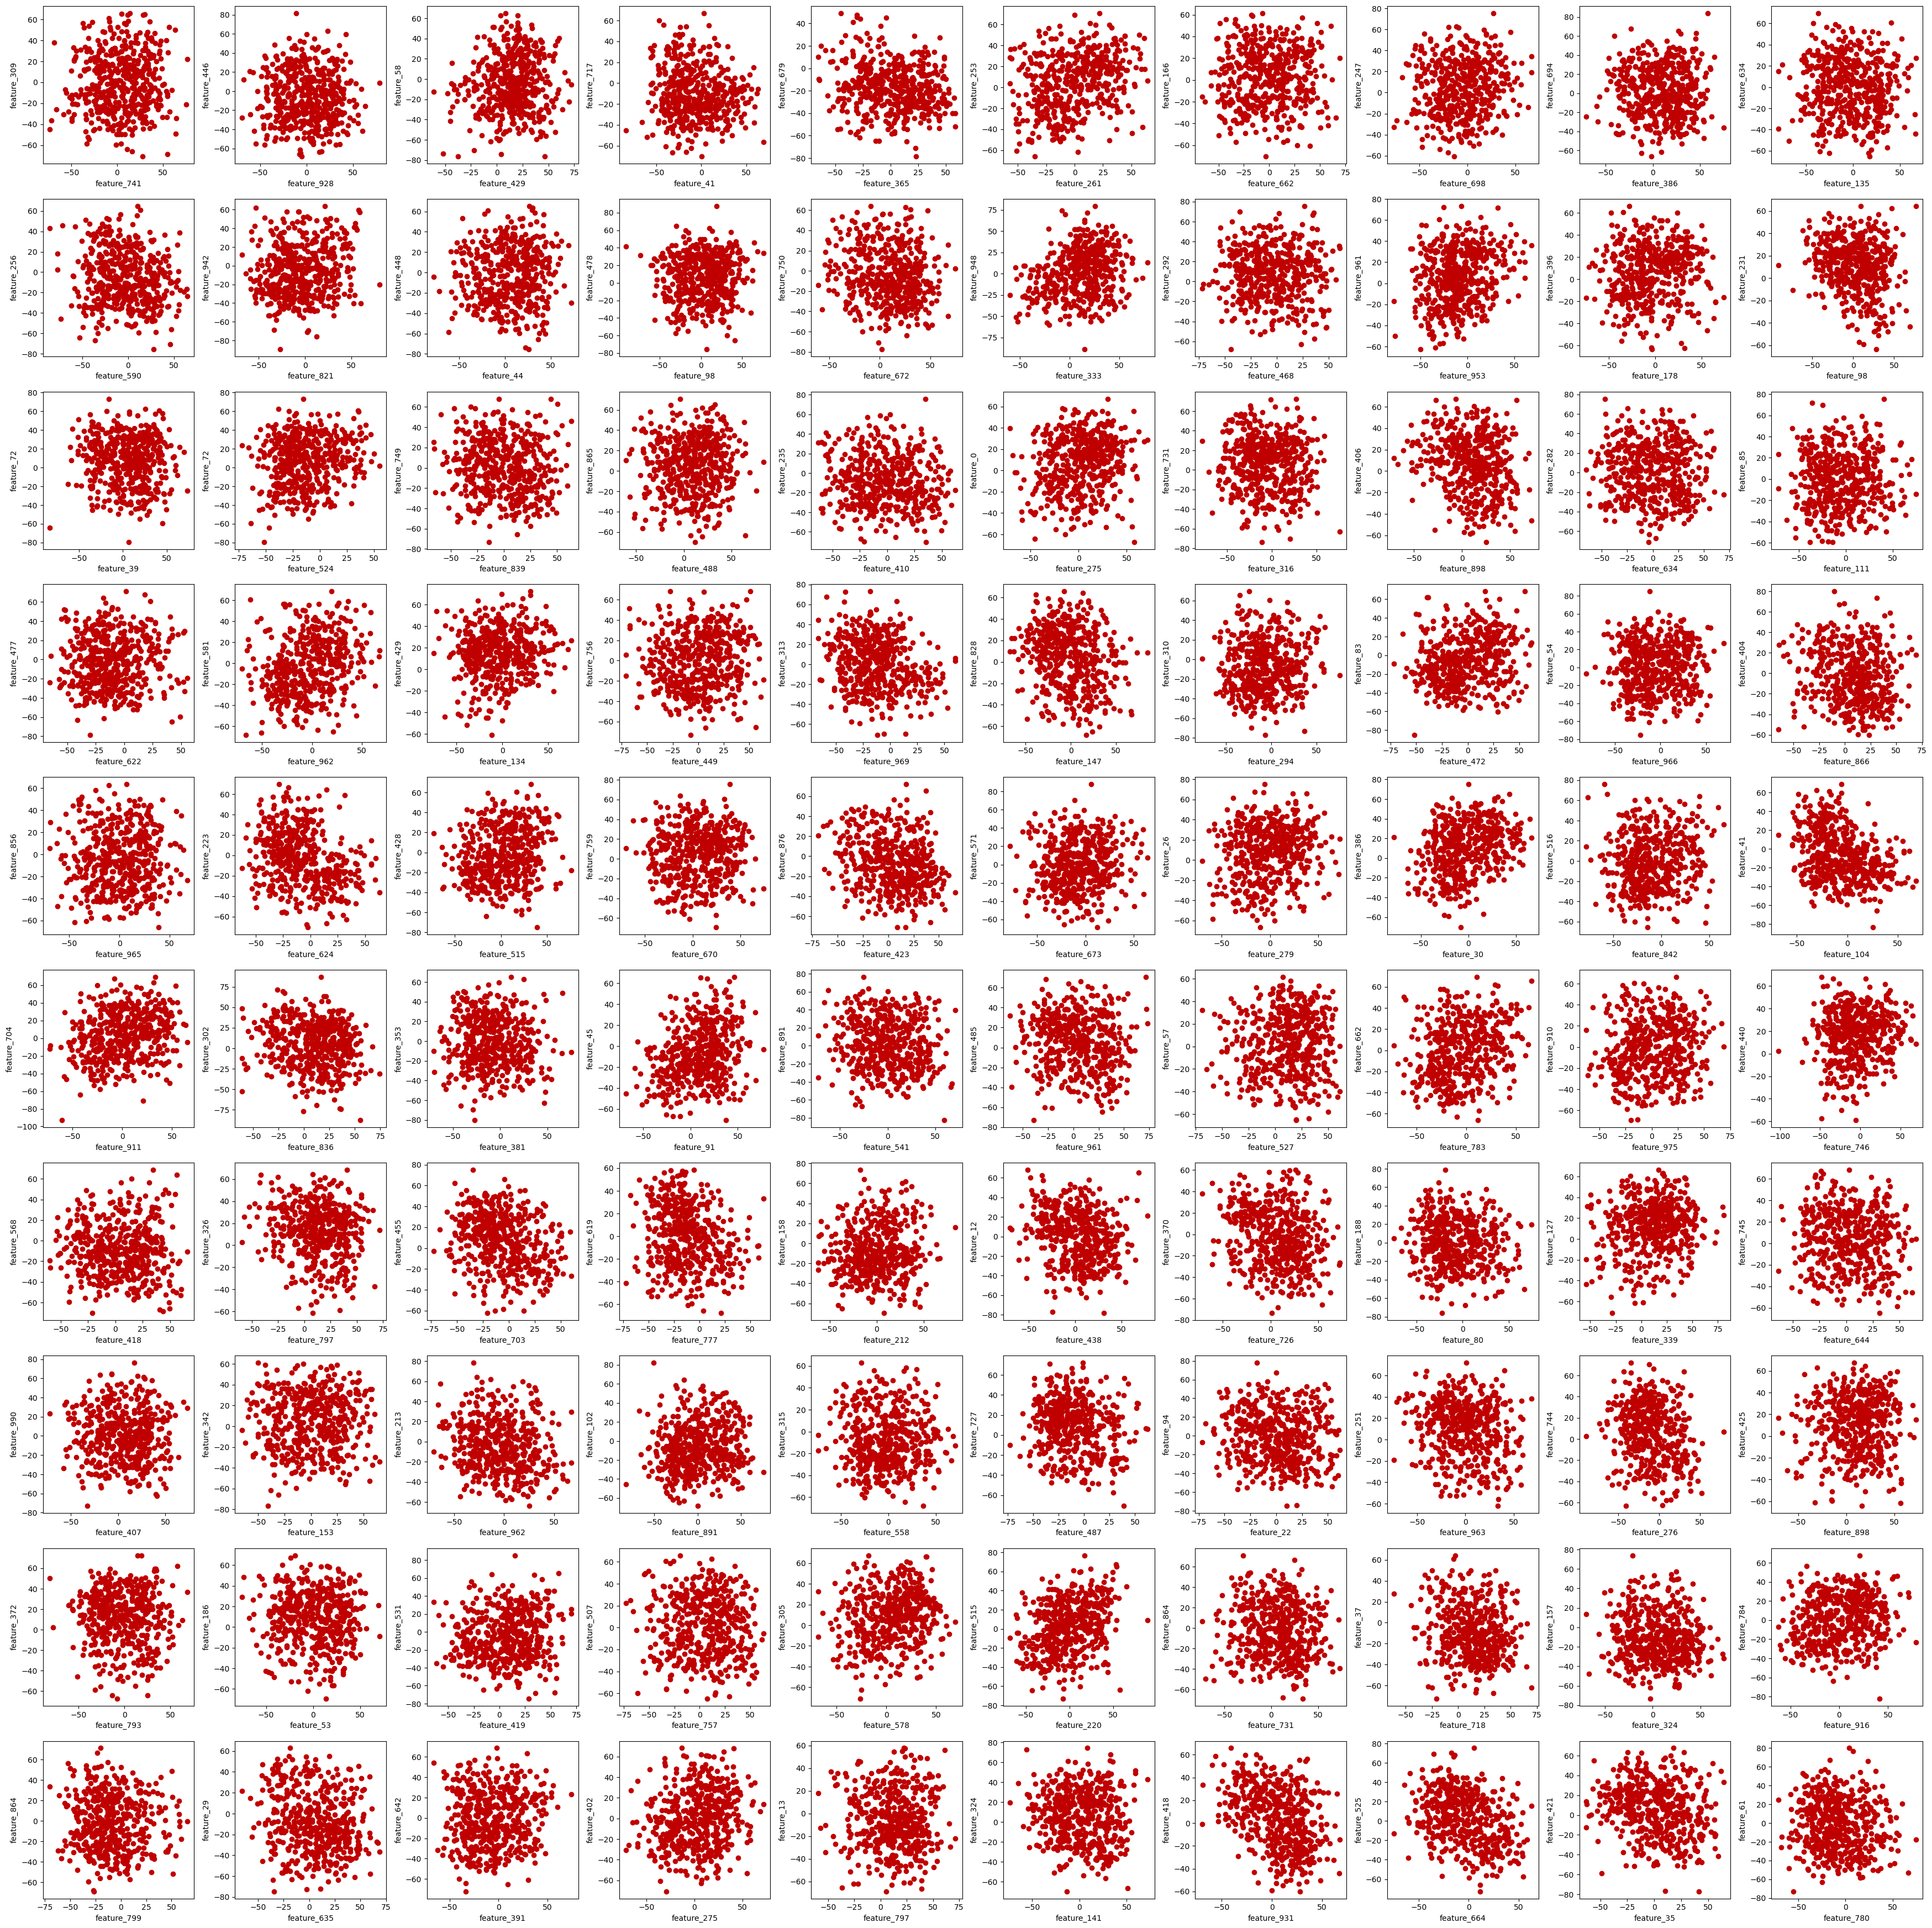

In [15]:
fig, axs = plt.subplots(10, 10, figsize=(35, 35))

i = 0
for rows in axs:
    for ax in rows:
        if i < len(pairs):  # Check to avoid index out of range error
            ax.scatter(df[pairs[i][0]], df[pairs[i][1]], color="#C00000")
            ax.set_xlabel(pairs[i][0])
            ax.set_ylabel(pairs[i][1])
            i += 1
        else:
            ax.axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()

- It looks like there is not much information hidden in the pariwise features.c Also, it is not possible to check every combination, due to the amount of features. Let's try to see the linear correlation b/w them.

In [16]:
corr = df.corr()

In [17]:
# This will show all the features that have correlation > 0.5 in absolute value. We remove the features
# With correlation == 1 to remove the correlation of a feature with itself.

mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

feature_81   feature_657   -0.631294
feature_657  feature_81    -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_792  feature_547    0.620864
feature_35   feature_965    0.631424
feature_965  feature_35     0.631424
feature_395  feature_985    0.632593
feature_985  feature_395    0.632593
Length: 1870, dtype: float64

- The maximum and minimum correlation is around 0.631 , - 0.632. This does not show too much as well.
-Let's try PCA decomposition to compress our data into a 2D subspace (plane) so we can plot it as scatter plot

In [19]:
# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
df_pca.head()

principal_component_1  principal_component_2
0             -46.235641              -1.672797
1            -210.208758             -84.068249
2             -26.352795            -127.895751
3            -116.106804            -269.368256
4            -110.183605            -279.657306

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'PCA decomposition')

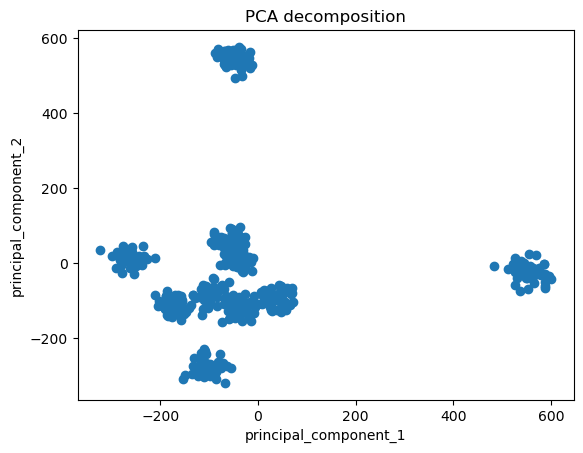

In [21]:
plt.scatter(df_pca['principal_component_1'], df_pca['principal_component_2'])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

- This is great we can see well define clusters

In [22]:
# pca.explained_variance_ratio_ returns a list where it shows the amount of variance explained by each principal component
pca.explained_variance_ratio_

array([0.07898605, 0.06674239])

In [23]:
sum(pca.explained_variance_ratio_)

0.14572843555106263

- We preseved only 14.6% of the variance
- We can clearly see clusters in our data.
- If we run a PCA to plot 3D, we will get more information from data.

In [24]:
pca_3 = PCA(n_components = 3).fit(df)
X_t = pca_3.transform(df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 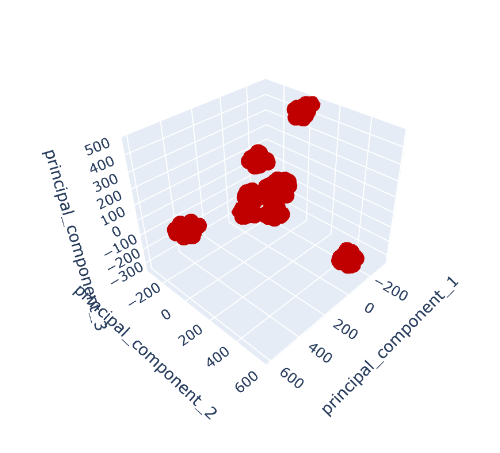

In [25]:
sum(pca_3.explained_variance_ratio_)

0.20806257816093282

- Now we prserved 20% of the variance and we can see 10 clusters